In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df = pd.read_csv("../Join_Tables/df_joined_final_for_mapping.csv")
df_con = pd.read_csv("../Original_CSVs_contaminant_remedy/Contaminants.csv", low_memory=False)

In [4]:
# df.head(3)
df.dtypes
# df.columns

EPA ID                                  object
Site Name                               object
City                                    object
County                                  object
State                                   object
National Priorities List Status         object
Superfund Alternative Approach          object
Construction Complete                   object
Site-wide Ready for Anticipated Use     object
Human Exposure Under Control            object
Groundwater Migration Under Control     object
Region                                 float64
Site ID                                  int64
Address                                 object
Zip                                    float64
FF Ind                                  object
NAI                                     object
Native American Entity (NAI Status)     object
Latitude                               float64
Longitude                              float64
NPL Status Date                         object
Site_ID_Fixed

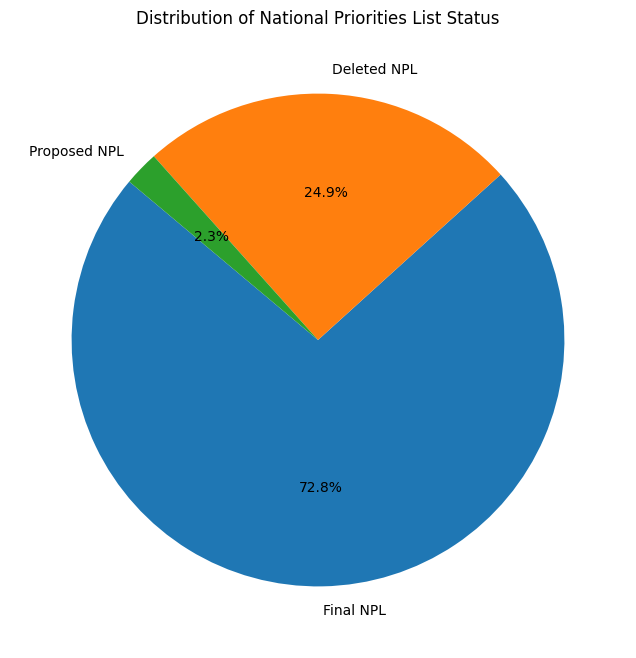

In [17]:
status_counts_npl_status = df["National Priorities List Status"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    status_counts_npl_status,
    labels=status_counts_npl_status.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Distribution of National Priorities List Status")
plt.show()

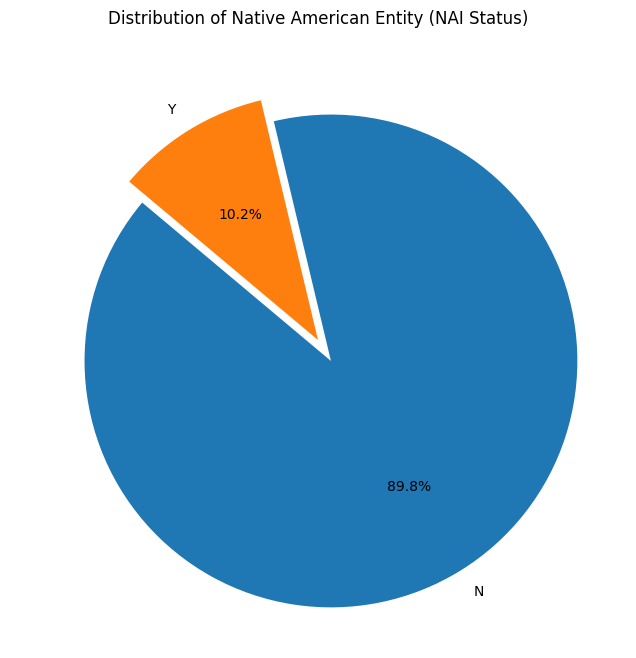

In [6]:
nai_counts = df["NAI"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    nai_counts,
    labels=nai_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.1, 0) 
)
plt.title("Distribution of Native American Entity (NAI Status)")
plt.show()

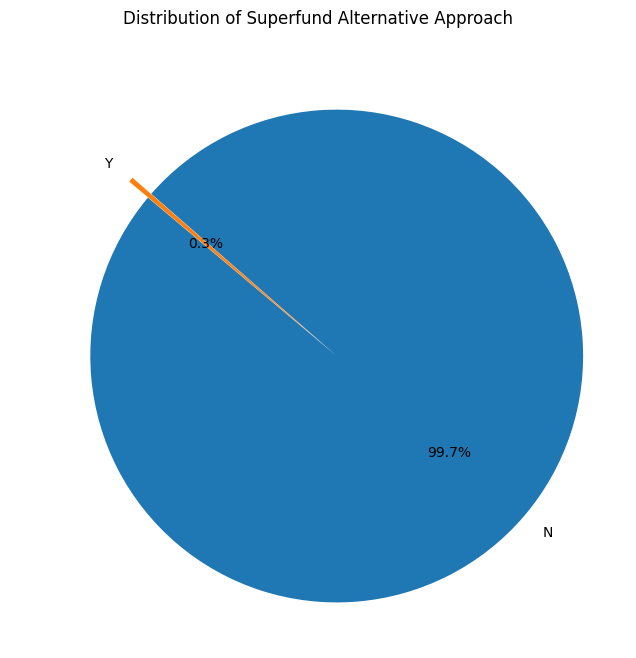

In [7]:
SAA_counts = df["Superfund Alternative Approach"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    SAA_counts,
    labels=nai_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.1, 0) 
)
plt.title("Distribution of Superfund Alternative Approach")
plt.show()

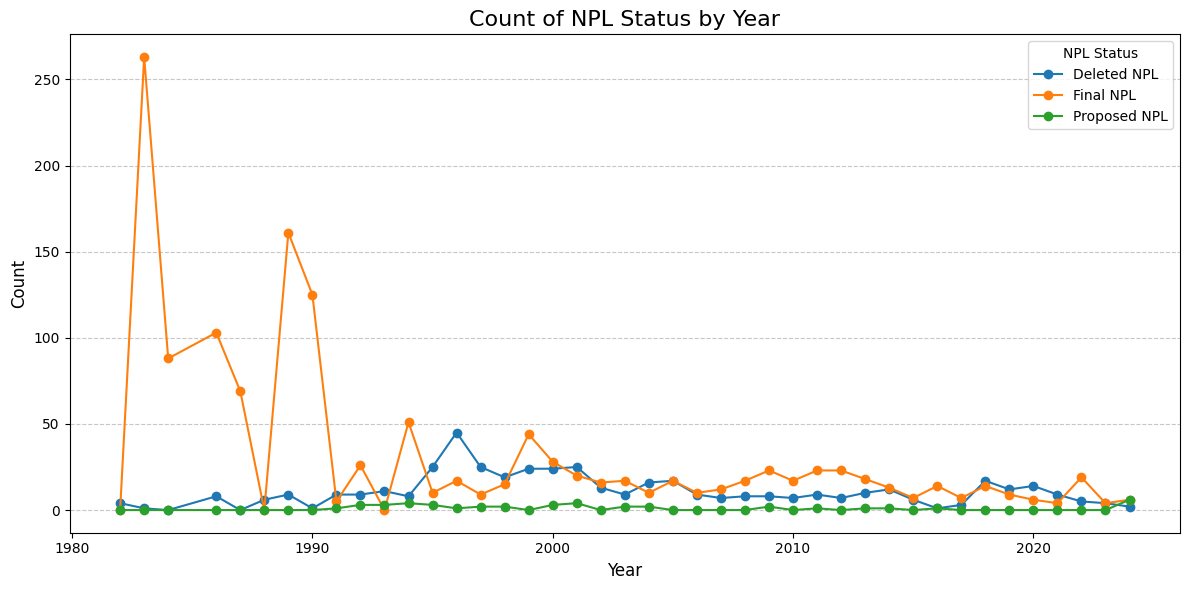

In [8]:
# Convert 'NPL Status Date' to datetime
df['NPL Status Date'] = pd.to_datetime(df['NPL Status Date'], format="%m/%d/%y")

# Extract the year from the date
df['Year'] = df['NPL Status Date'].dt.year

# Group by Year and NPL Status to get counts
grouped = df.groupby(['Year', 'National Priorities List Status']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
for status in grouped.columns:
    plt.plot(grouped.index, grouped[status], marker='o', label=status)

# Customize the chart
plt.title('Count of NPL Status by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title="NPL Status", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()

In [9]:
df_con.columns

Index(['Site Name', 'EPA ID', 'City', 'County', 'State', 'ZIP Code',
       'Latitude', 'Longitude', 'Region', 'NPL Status',
       'Superfund Alternative Agreement', 'Federal Facility',
       'Operable Unit Number', 'Sequence ID', 'Decision Document Type',
       'Actual Completion Date', 'Fiscal Year', 'Media', 'Contaminant Name'],
      dtype='object')

In [10]:
colors = [
    "#1f77b4",
    "#aec7e8",
    "#ff7f0e",
    "#ffbb78",
    "#98df8a",
    "#d62728",
    "#ff9896",
    "#9467bd",
    "#8c564b",
    "#c49c94",
    "#e377c2",
    "#f7b6d2",
    "#c7c7c7",
    "#bcbd22",
    "#dbdb8d",
    "#17becf",
    "#9edae5"
]

In [11]:
top_twenty_contaminants = df_con["Contaminant Name"].value_counts().head(20)

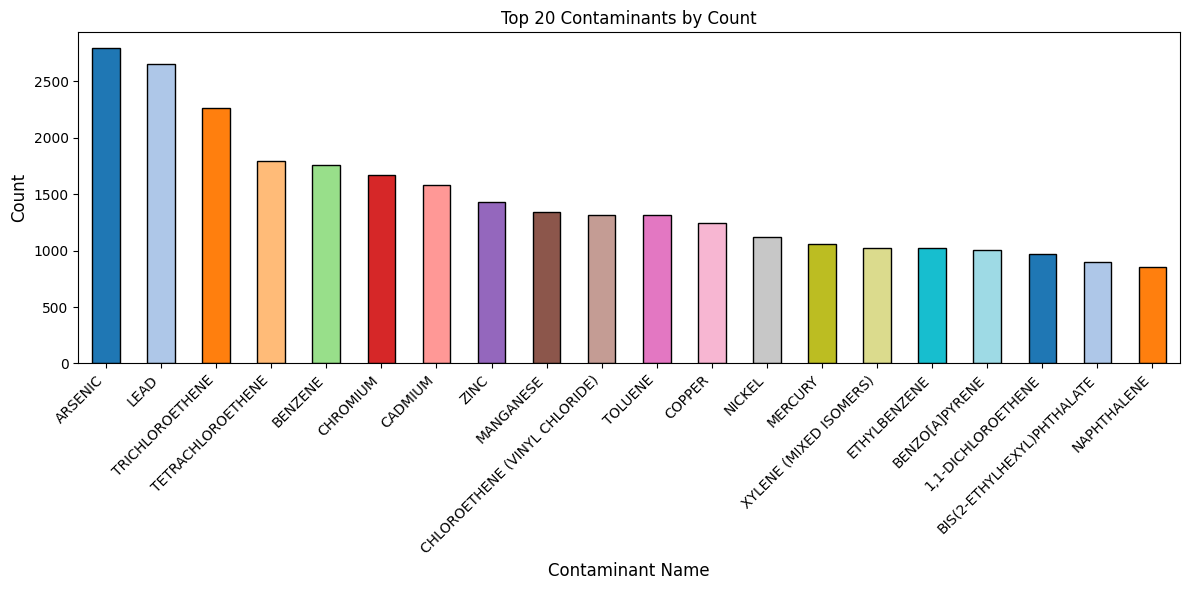

In [12]:
top_twenty_contaminants.plot(
    kind='bar',
    figsize=(12, 6),
    color=colors,
    edgecolor='black',
    title='Top 20 Contaminants by Count'
)

# Customize the chart
plt.xlabel('Contaminant Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

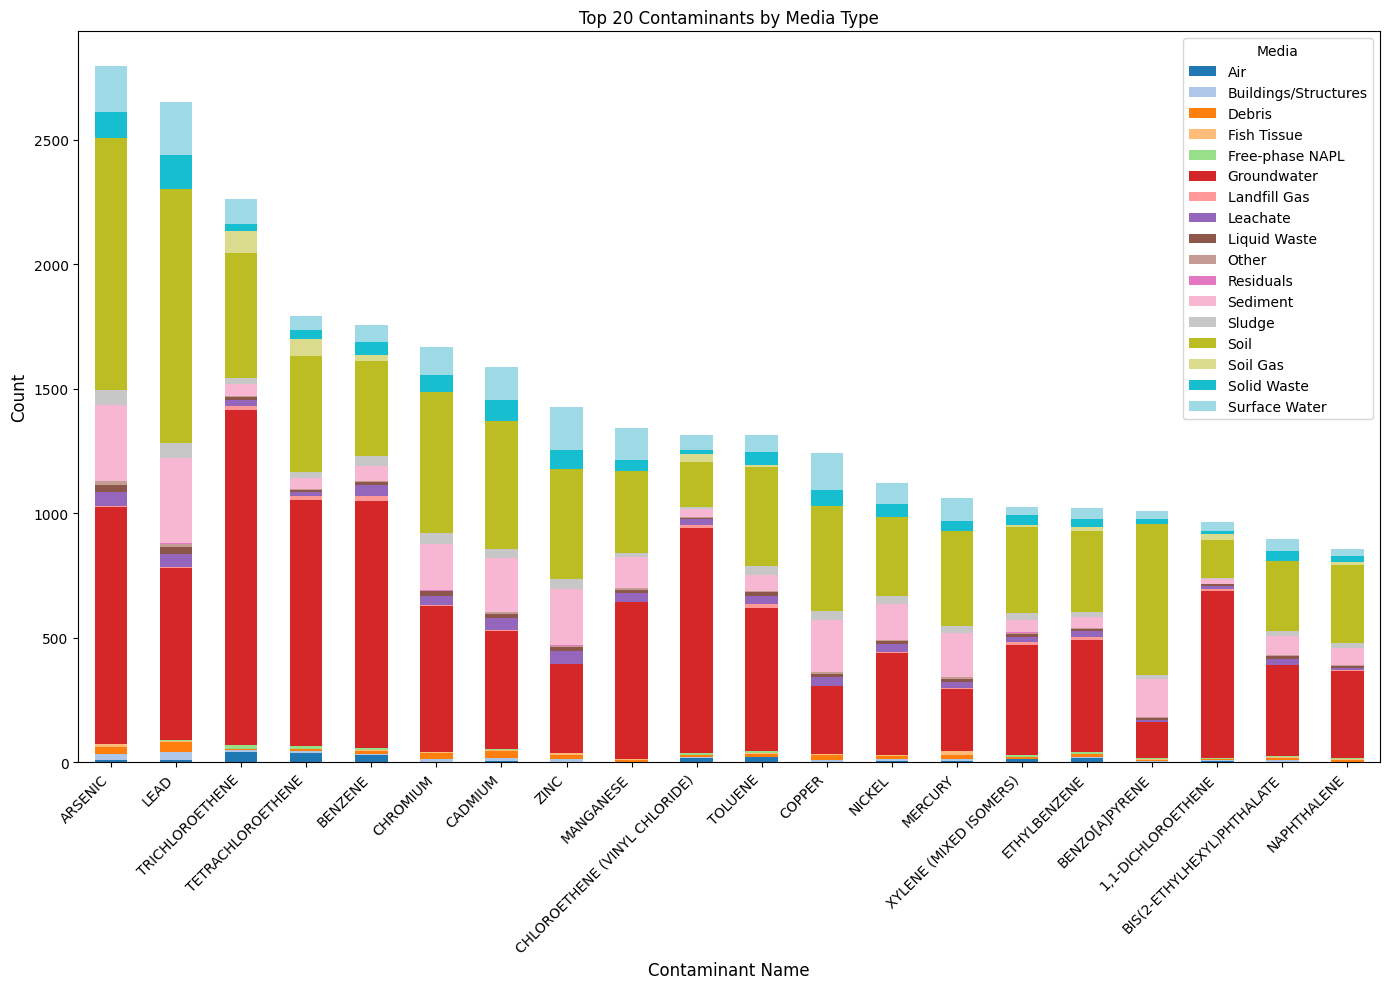

In [13]:
grouped_contaminat_media_data = df_con.groupby(["Contaminant Name", "Media"]).size().unstack(fill_value=0)
top_20_data = grouped_contaminat_media_data.loc[top_twenty_contaminants.index]  

top_20_data.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 10),
    title="Top 20 Contaminants by Media Type",
    color=colors 
)

plt.xlabel("Contaminant Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Media", fontsize=10)
plt.tight_layout()

plt.show()

In [14]:
top_twenty_contaminants_media = df_con["Media"].value_counts().head(20)

In [15]:
top_twenty_contaminants_media

Media
Groundwater             26590
Soil                    23635
Sediment                 6750
Surface Water            3935
Solid Waste              2385
Sludge                   1380
Leachate                 1322
Debris                    842
Liquid Waste              690
Soil Gas                  591
Buildings/Structures      560
Air                       440
Other                     314
Landfill Gas              306
Fish Tissue               254
Free-phase NAPL           173
Residuals                  19
Name: count, dtype: int64

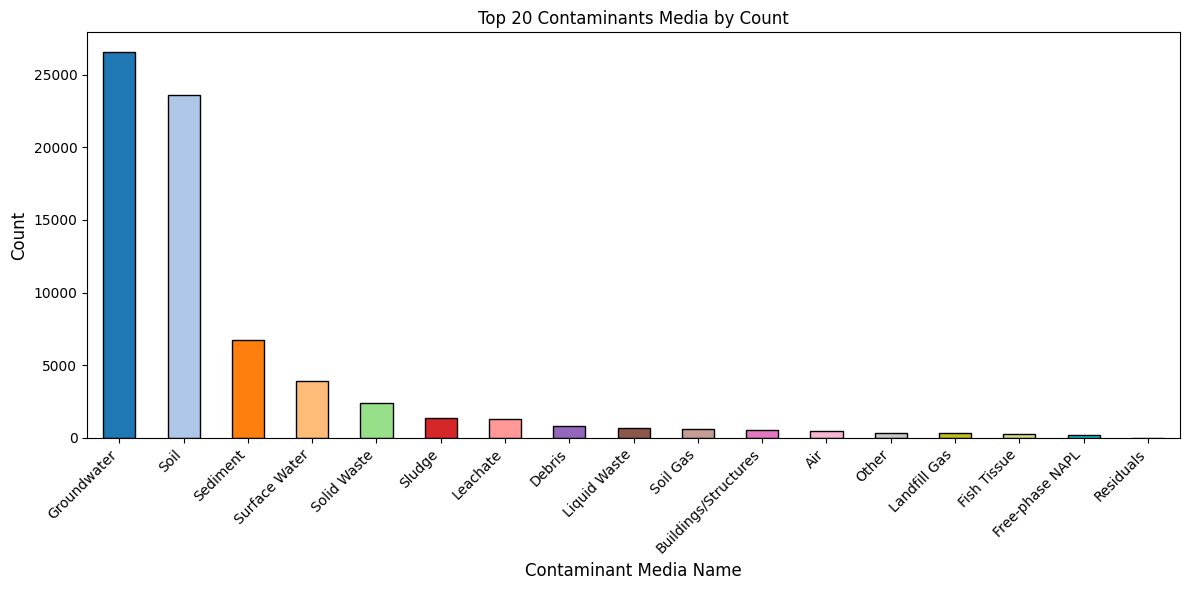

In [16]:
top_twenty_contaminants_media.plot(
    kind='bar',
    figsize=(12, 6),
    color=colors,
    edgecolor='black',
    title='Top 20 Contaminants Media by Count'
)

# Customize the chart
plt.xlabel('Contaminant Media Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()